In [163]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from infer import infer
import seaborn as sns

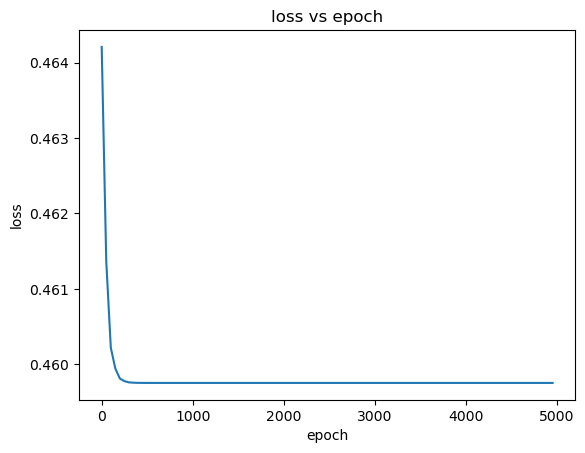

In [164]:
loss=np.load('loss.npy')
ls=[]
for i in range(0,100):
    ls.append(i*50)
plt.plot(ls,loss)
plt.title('loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [165]:
W_path="weights/W_weights epoch:4900.npy"
b_path="weights/b_weights epoch:4900.npy"
features_preprocess=["AgeCategory","Race","GenHealth","HeartDisease",'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
features_normalise=["BMI","SleepTime","PhysicalHealth","MentalHealth","AgeCategory","Race","GenHealth"]
data_path='heartDisease.csv'
batch=379
    
y_pred,y_true=infer(W_path,b_path,batch,features_preprocess,features_normalise,data_path)
conf_matrix = confusion_matrix(np.reshape(y_true,(-1)), np.reshape(y_pred,(-1)))

(1, 17)


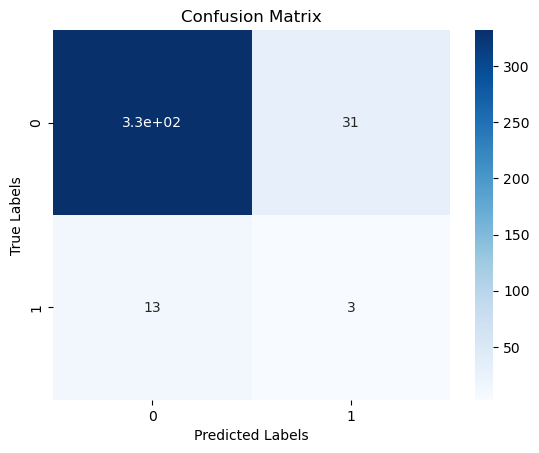

In [166]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [167]:
Accuracy=1-np.count_nonzero(y_pred-y_true)/batch

In [168]:
print(Accuracy)

0.8839050131926122
